In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm

In [3]:
def fft_freq_clipping(f_FFT: np.ndarray, f_low, f_high):
    """Clip an FFT frequency bin by frequency lower bounds and upper bounds."""
    f_low_idx, f_high_idx = -1, -1
    if f_low <= f_FFT[0]:
        f_low_idx = 0
    if f_high >= f_FFT[-1]:
        f_high_idx = len(f_FFT)
    for i in range(len(f_FFT) - 1):
        if f_FFT[i] < f_low and f_FFT[i+1] >= f_low:
            f_low_idx = i + 1
        if f_FFT[i] <= f_high and f_FFT[i+1] > f_high:
            f_high_idx = i + 1
    if f_low_idx == -1 or f_high_idx == -1:
        raise RuntimeError('Incorrect FFT frequency bound')

    return f_low_idx, f_high_idx

In [4]:
clean = np.load("stft_object_clipping.npy")
print(clean.shape)

(2, 300, 36, 234)


In [5]:
DAS_Drill = np.load("npy_files_predict\Drill\Drill_Test.npy")[0,:,:]
DAS_Shaver = np.load("npy_files_predict\Shaver\Shaver_Test.npy")[0,:,:]

In [6]:
ICA_Drill = np.load("npy_files_predict\Drill\Drill_Test_ICA.npy")[0,:,:]
ICA_Shaver = np.load("npy_files_predict\Shaver\Shaver_Test_ICA.npy")[0,:,:]

In [7]:
DASICA_Drill = np.load("npy_files_predict\Drill\Drill_Test_DASICA.npy")[0,:,:]
DASICA_Shaver = np.load("npy_files_predict\Shaver\Shaver_Test_DASICA.npy")[0,:,:]

In [8]:
clean_drill = clean[0,10,:,:]
clean_shaver = clean[1,1,:,:]

In [9]:
f_low = 16000
f_high = 40000
window_len = 1024
fs = 96000
f_FFT = np.linspace(0, fs / 2, window_len // 2 + 1)
f_low = 16000
f_high = 40000
f_low_del = 24000
f_high_del = 26000
f_low_idx,f_high_idx = fft_freq_clipping(f_FFT, f_low, f_high)
f_low_didx,f_high_didx = fft_freq_clipping(f_FFT, f_low_del, f_high_del)
f_FFT = np.concatenate([f_FFT[f_low_idx:f_low_didx],f_FFT[f_high_didx:f_high_idx]])
print(f_FFT.shape)

(234,)


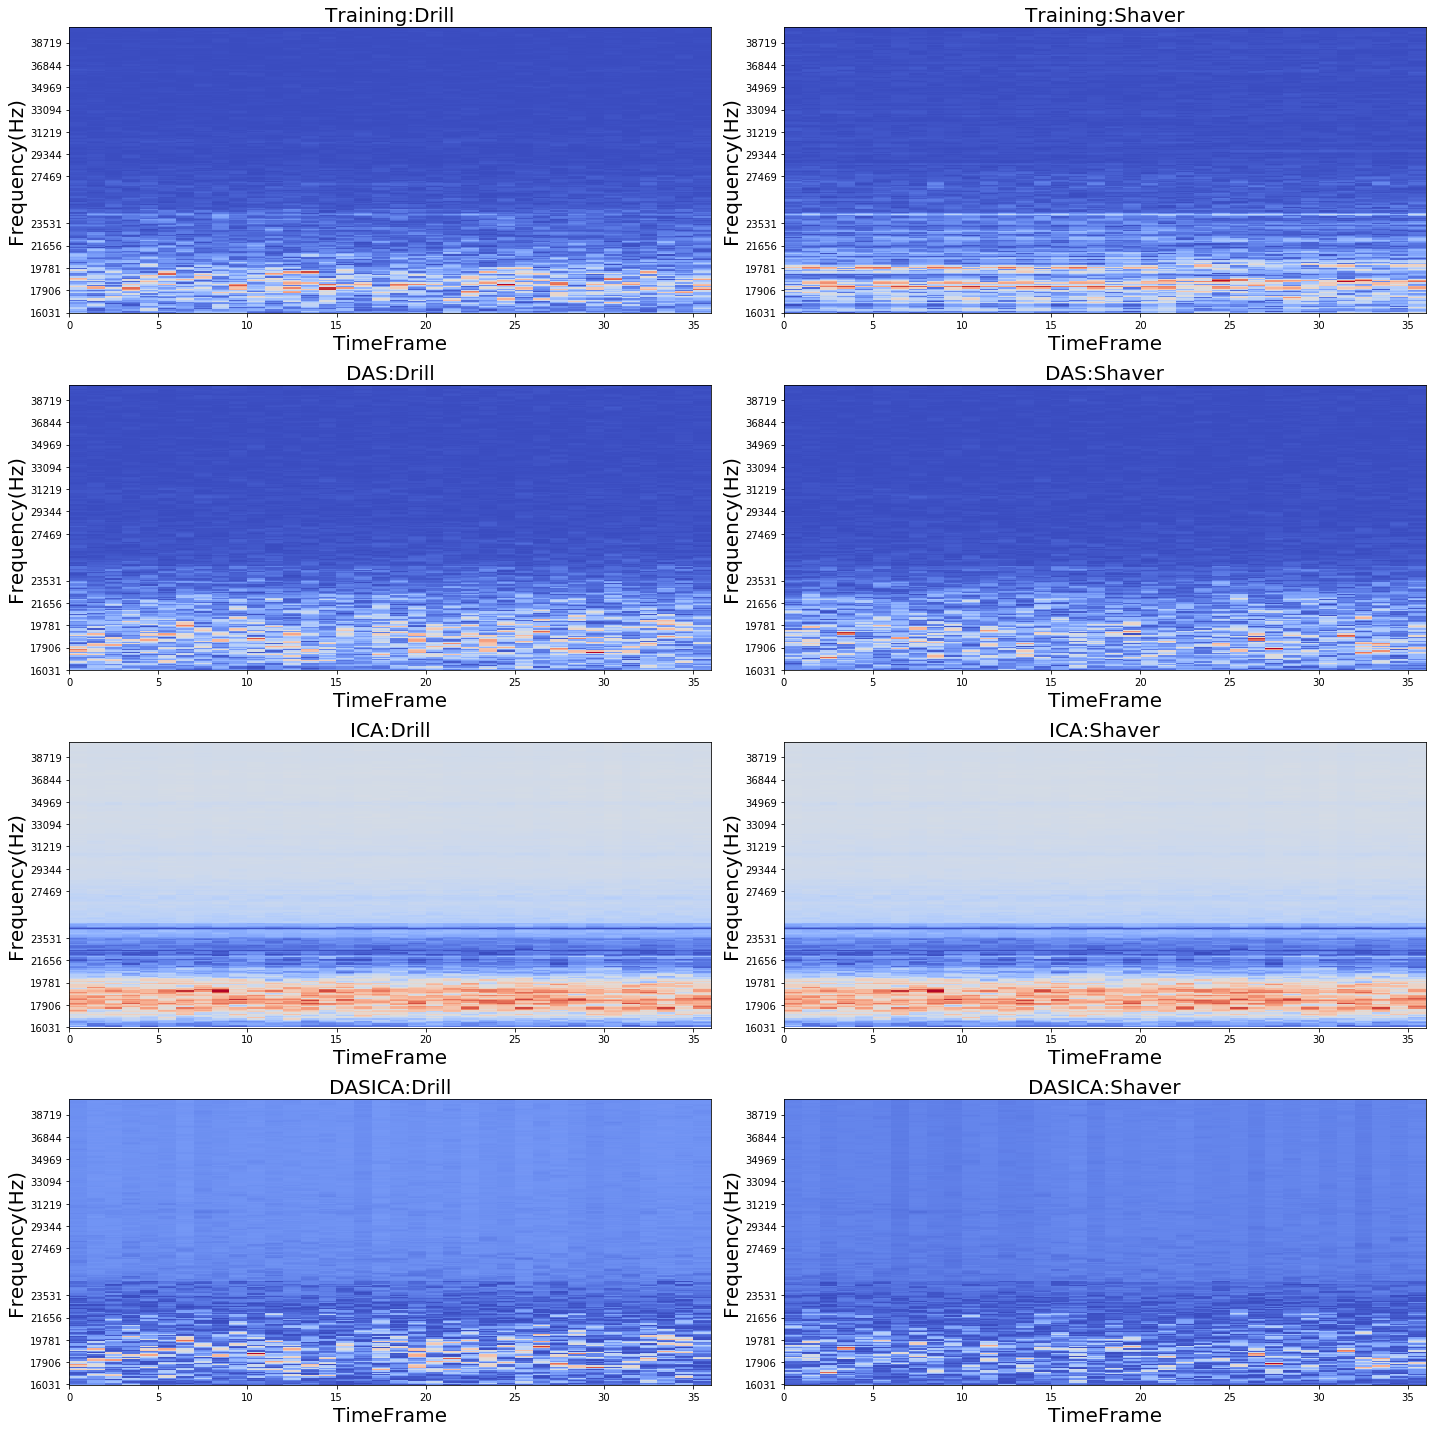

In [16]:
fig,ax = plt.subplots(4,2,figsize=(20,20),tight_layout=True)

img = ax[0,0].imshow(clean_drill.T,aspect="auto",origin="lower",cmap=cm.coolwarm,extent=[0,clean.shape[2],f_low,f_high])
#fig.colorbar(img,ax=ax)
ax[0,0].set_yticks(f_FFT[0:-1:20])
ax[0,0].set_xlabel("TimeFrame",fontsize=20)
ax[0,0].set_ylabel("Frequency(Hz)",fontsize=20)
ax[0,0].set_title("Training:Drill",fontsize=20)

img = ax[0,1].imshow(clean_shaver.T,aspect="auto",origin="lower",cmap=cm.coolwarm,extent=[0,clean.shape[2],f_low,f_high])
ax[0,1].set_yticks(f_FFT[0:-1:20])
ax[0,1].set_xlabel("TimeFrame",fontsize=20)
ax[0,1].set_ylabel("Frequency(Hz)",fontsize=20)
ax[0,1].set_title("Training:Shaver",fontsize=20)

img = ax[1,0].imshow(DAS_Drill.T,aspect="auto",origin="lower",cmap=cm.coolwarm,extent=[0,clean.shape[2],f_low,f_high])
ax[1,0].set_yticks(f_FFT[0:-1:20])
ax[1,0].set_xlabel("TimeFrame",fontsize=20)
ax[1,0].set_ylabel("Frequency(Hz)",fontsize=20)
ax[1,0].set_title("DAS:Drill",fontsize=20)

img = ax[1,1].imshow(DAS_Shaver.T,aspect="auto",origin="lower",cmap=cm.coolwarm,extent=[0,clean.shape[2],f_low,f_high])
ax[1,1].set_yticks(f_FFT[0:-1:20])
ax[1,1].set_xlabel("TimeFrame",fontsize=20)
ax[1,1].set_ylabel("Frequency(Hz)",fontsize=20)
ax[1,1].set_title("DAS:Shaver",fontsize=20)

img = ax[2,0].imshow(ICA_Drill.T,aspect="auto",origin="lower",cmap=cm.coolwarm,extent=[0,clean.shape[2],f_low,f_high])
ax[2,0].set_yticks(f_FFT[0:-1:20])
ax[2,0].set_xlabel("TimeFrame",fontsize=20)
ax[2,0].set_ylabel("Frequency(Hz)",fontsize=20)
ax[2,0].set_title("ICA:Drill",fontsize=20)

img = ax[2,1].imshow(ICA_Shaver.T,aspect="auto",origin="lower",cmap=cm.coolwarm,extent=[0,clean.shape[2],f_low,f_high])
ax[2,1].set_yticks(f_FFT[0:-1:20])
ax[2,1].set_xlabel("TimeFrame",fontsize=20)
ax[2,1].set_ylabel("Frequency(Hz)",fontsize=20)
ax[2,1].set_title("ICA:Shaver",fontsize=20)

img = ax[3,0].imshow(DASICA_Drill.T,aspect="auto",origin="lower",cmap=cm.coolwarm,extent=[0,clean.shape[2],f_low,f_high])
ax[3,0].set_yticks(f_FFT[0:-1:20])
ax[3,0].set_xlabel("TimeFrame",fontsize=20)
ax[3,0].set_ylabel("Frequency(Hz)",fontsize=20)
ax[3,0].set_title("DASICA:Drill",fontsize=20)

img = ax[3,1].imshow(DASICA_Shaver.T,aspect="auto",origin="lower",cmap=cm.coolwarm,extent=[0,clean.shape[2],f_low,f_high])
ax[3,1].set_yticks(f_FFT[0:-1:20])
ax[3,1].set_xlabel("TimeFrame",fontsize=20)
ax[3,1].set_ylabel("Frequency(Hz)",fontsize=20)
ax[3,1].set_title("DASICA:Shaver",fontsize=20)

plt.savefig("Data_Inspection.jpg")

Text(0, 0.5, 'Frequency(Hz)')

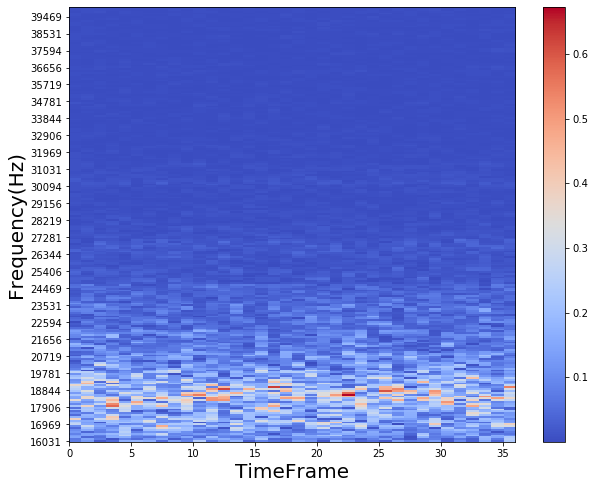

In [105]:
tmp_Drill = np.load("npy_files_predict/Drill_Test1.npy")[0,:,:]
fig,ax = plt.subplots(figsize=(10,8))
img = ax.imshow(tmp_Drill.T,aspect="auto",origin="lower",cmap=cm.coolwarm,extent=[0,clean.shape[2],f_low,f_high])
fig.colorbar(img,ax=ax)
ax.set_yticks(f_FFT[0:-1:10])
ax.set_xlabel("TimeFrame",fontsize=20)
ax.set_ylabel("Frequency(Hz)",fontsize=20)